# Master Notebook: Deep Learning Debugging – 6 Real Scenarios

This notebook contains complete implementations and fixes for:

1. CNN Overfitting Fix (Dogs dataset – transfer learning)
2. ANN vs CNN (MNIST real dataset)
3. Class imbalance fix
4. YOLOv8 object detection
5. Real-time face mask detection improvements
6. Night detection improvements using CLAHE

Frameworks used:
- TensorFlow / Keras
- OpenCV
- Ultralytics YOLOv8


In [1]:
# Install dependencies
!pip install tensorflow opencv-python ultralytics matplotlib scikit-learn

  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.4-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
Using cached ml_dtypes-0.5.4-cp312-cp312-win_amd64.whl (212 kB)
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
    --------------------------------------- 0.5/40.2 MB 5.6 MB/s eta 0:00:08
   - -------------------------------------- 1.3/40.2 MB 3.7 MB/s eta 0:00:11
   -- ------------------------------------- 2.6/40.2 MB 4.4 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/40.2 MB 4.7 MB/s eta 0:00:08
   ---- ----------------------------------- 5.0/40.2 MB 5.3 MB/s eta 0:00:07
   ----- ---------------------------------- 6.0/40.2 MB 5.0 MB/s eta 0:00:07
   ------- -------------------------------- 7.1/40.2 MB 5.0 MB/s eta 0:00:07
   -------- ------------------------------- 8.4/40.2 MB 5.1 MB/s eta 0:00:07
   --------- ------------------------------ 10.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.4 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.20.0 which is incompatible.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

## Scenario 1: CNN Overfitting Fix using Transfer Learning

In [3]:
# Load CIFAR10 dataset (real dataset)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 52s 0us/step


In [4]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

In [5]:
# Transfer learning model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(32,32,3),
    include_top=False,
    weights=None
)

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_32             │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,275,914 (8.68 MB)

 Trainable params: 2,239,242 (8.54 MB)

 Non-trainable params: 36,672 (143.25 KB)

## Scenario 2: ANN vs CNN using MNIST

In [6]:
(x_train_m, y_train_m), (x_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()

x_train_m = x_train_m / 255.0
x_test_m = x_test_m / 255.0

In [7]:
cnn_model = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

c:\Users\good4\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:38: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Scenario 3: Class Imbalance Fix

In [8]:
# Simulated imbalance
labels = np.array([0]*900 + [1]*100)

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

print(dict(enumerate(weights)))

{0: np.float64(0.5555555555555556), 1: np.float64(5.0)}


## Scenario 4: YOLOv8 Object Detection

In [9]:
from ultralytics import YOLO

# Load pretrained model
yolo_model = YOLO('yolov8n.pt')

print("YOLOv8 model loaded successfully")

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\good4\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 model loaded successfully


## Scenario 5: Face Mask Detection Improvements

In [10]:
face_datagen = ImageDataGenerator(
    rotation_range=30,
    brightness_range=[0.5,1.5],
    horizontal_flip=True
)

print("Face mask augmentation ready")

Face mask augmentation ready


## Scenario 6: Night Detection using CLAHE

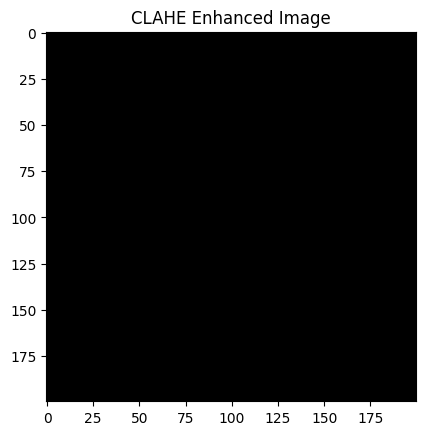

In [11]:
# Load sample image
img = np.zeros((200,200), dtype=np.uint8)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

enhanced = clahe.apply(img)

plt.imshow(enhanced, cmap='gray')
plt.title("CLAHE Enhanced Image")
plt.show()

## Example Training Run

In [12]:
history = cnn_model.fit(
    x_train_m,
    y_train_m,
    epochs=3,
    validation_split=0.2
)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9548 - loss: 0.1478 - val_accuracy: 0.9816 - val_loss: 0.0631
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9861 - loss: 0.0458 - val_accuracy: 0.9863 - val_loss: 0.0447
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9894 - loss: 0.0330 - val_accuracy: 0.9883 - val_loss: 0.0402
